**PROECT NAME - ANB HOTEL BOOKING ANALYSYS**

**CONTRIBUTION - INDVIDUAL**




# **What is Airbnb?**
**Airbnb has interesting breakdown with names likely: Air, Bed and Breakfast to become Airbnb. Wow! This San-Francisco based startup offers you someone’s home as a place to stay instead of a hotel. Looks, somewhat on a same business as OYO but the former doesn't owns any property instead acts as an intermediary between those who want to rent out space and those who are looking for space to rent.**

# **PROECT SUMMERY**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns.

## **GitHub Link**

# **PROBLEM STATEMENT**

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

**Lets begin with librearies....**

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

In [ ]:
# import file path...
df=pd.read_csv('/content/Airbnb NYC 2019 (1).csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# **DATA EXPLORATION**

In [ ]:
# Information about file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# all column heading..
df.columns
  

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Shape of file..
df.shape

(48895, 16)

In [ ]:
# checking all id is unique or not....we get number of unique id....so ther is no duplicate id.
df['id'].nunique()


48895

# Extract particular data....

In [ ]:
# extract data in name for cozy entire floor of brownstone....
df.loc[df['name']== 'Cozy Entire Floor of Brownstone']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194


In [ ]:
# Extract host_name of lura...
df.loc[df['host_name']=='Laura']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
448,158176,Entire Apt in Heart of Williamsburg,573065,Laura,Brooklyn,Williamsburg,40.71534,-73.95914,Entire home/apt,165,5,117,6/29/2019,1.28,1,23
921,342995,Unique private room and bathroom in Brownstone,1740216,Laura,Manhattan,Harlem,40.81169,-73.94355,Private room,75,2,77,7/1/2019,0.88,2,144
1077,453161,"Family friendly, sunny new condo in McCarren Park",2107905,Laura,Brooklyn,Greenpoint,40.72183,-73.94908,Entire home/apt,260,2,7,6/23/2018,0.09,1,0
1083,455734,"Sunny, spacious 1-bedroom in Upper Manhattan",2265389,Laura,Manhattan,Inwood,40.86929,-73.92421,Entire home/apt,50,2,123,7/2/2019,1.47,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45995,35026161,Cozy Studio in UWS Luxury Building with Gym #6107,116305897,Laura,Manhattan,Upper West Side,40.78908,-73.97231,Entire home/apt,150,30,0,NaN,NaN,9,311
46740,35415829,2 BEDROOMS best Brooklyn area,176463632,Laura,Brooklyn,Greenpoint,40.72025,-73.94658,Entire home/apt,400,4,0,NaN,NaN,1,348
47457,35742470,⍟Times Square | The Feeling of Home in Manhattan⍟,181773256,Laura,Manhattan,Midtown,40.75090,-73.98557,Entire home/apt,450,1,0,NaN,NaN,1,65
48144,36108534,Luxury 1 bed in UWS Finest Building with Gym #...,116305897,Laura,Manhattan,Upper West Side,40.78935,-73.97389,Entire home/apt,180,30,0,NaN,NaN,9,311


In [ ]:
# There are few listings where the property name and the host have same names...
df[df['name']==df['host_name']]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,1/30/2018,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,10/30/2015,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,9/10/2018,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,7/23/2017,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,10/8/2017,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,1/2/2018,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,6/10/2018,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [ ]:
# extrat data in neighbourhood_group of Bronx..
df.loc[df['neighbourhood_group']=='Bronx']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,7/4/2019,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,6/30/2019,1.45,3,323
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
261,63610,DOMINIQUE'S NY mini efficiency* wifi*metro*quiet,310670,Vie,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,6/27/2019,0.50,13,365
309,71812,Condo Apartment with laundry in unit,369015,Thai,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,1/2/2019,0.35,2,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,36426093,Best room in nyc,273877318,Jay,Bronx,Claremont Village,40.83926,-73.91173,Private room,140,1,0,NaN,NaN,1,90
48792,36428186,Private house Apartment,141511069,Carolina,Bronx,Morrisania,40.83146,-73.89666,Entire home/apt,80,7,0,NaN,NaN,1,71
48795,36429652,Cute double room for the perfect Yankee fan,58222366,Dominique,Bronx,Claremont Village,40.83502,-73.91058,Private room,125,2,0,NaN,NaN,1,364
48796,36435986,1A. Studio & Stay. 30 minutes to Midtown Manha...,37678939,Chantal,Bronx,Concourse Village,40.83372,-73.91187,Private room,70,2,0,NaN,NaN,2,81


In [ ]:
#expriment with two condition....
df.loc[(df['neighbourhood_group']=='Manhattan') & (df['host_name']=='Natasha')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4702,3304307,Lovely Shiny Private Room in NYC,12465884,Natasha,Manhattan,East Harlem,40.79269,-73.94218,Private room,100,3,64,6/1/2019,1.05,1,219
4853,3458525,Modern & Cozy 1BD Garden Apt,17430718,Natasha,Manhattan,Harlem,40.81511,-73.94315,Entire home/apt,115,3,64,6/19/2019,1.05,2,211
8686,6673630,Stylish L.E.S Studio,6591262,Natasha,Manhattan,Lower East Side,40.71661,-73.98916,Entire home/apt,150,3,1,8/1/2015,0.02,1,0
9376,7193201,Private RM in Heart of East Village,33739627,Natasha,Manhattan,East Village,40.72896,-73.98430,Private room,99,1,4,10/24/2015,0.08,1,0
10310,7894907,Cosy studio in East Village,1830864,Natasha,Manhattan,East Village,40.72395,-73.98001,Entire home/apt,150,2,25,7/22/2016,0.55,1,0
11344,8813547,For Christmas-Large New 1 BR Near Central Park,30350590,Natasha,Manhattan,Theater District,40.76268,-73.98407,Private room,230,5,10,9/10/2016,0.23,1,0
20061,16066223,"Spacious, quiet 1 br apt in beautiful Inwood!",1713011,Natasha,Manhattan,Inwood,40.86757,-73.92699,Entire home/apt,89,14,14,5/13/2019,0.57,1,4
21145,16779705,Cozy West Village Studio,11699846,Natasha,Manhattan,Greenwich Village,40.73239,-73.99960,Entire home/apt,103,2,15,10/28/2018,0.57,1,0
22125,17808917,Gorgeous & Spacious UES apartment,85218001,Natasha,Manhattan,Upper East Side,40.77666,-73.95618,Private room,105,2,8,6/16/2018,0.30,1,0
24200,19499668,Cozy Sofa Bed in Upper Manhattan,3372118,Natasha,Manhattan,Washington Heights,40.84133,-73.93739,Shared room,50,1,21,6/15/2019,0.86,1,188


In [ ]:
# Extract price with 0 value and lenghth of it....
df[df['price']==0]
len(df[df['price']==0])

11

In [ ]:
# host ids with most listings counts...
df['host_id'].value_counts()[:4]

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

# **DATA PRE-PROCESSING -**


**Find null or missing values..**

In [ ]:
#Checking null values.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So, we can see null value is avavilable in name and host name .First we remove the null value. We can also see that last review and review per month have maximum null value so we drop both columns.

# **DATA CLEANING**

In [ ]:
#since both 'name' and 'host_name' has very less missing values as compared to 47,905 listings and 11452 unique hosts!
df = df.dropna(subset=['name'])
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# Now there is no null values...
df[['name']].isnull().value_counts()

name 
False    48879
dtype: int64

In [ ]:
df = df.dropna(subset=['host_name'])
df[['name']].isnull().value_counts()

name 
False    48858
dtype: int64

In [ ]:
no_of_hosts= df['host_name'].nunique()
print(f'The no of hosts in NYC: {no_of_hosts}')
no_of_listings= df['name'].nunique()
print(f'The total no of listings in NYC: {no_of_listings}')

The no of hosts in NYC: 11450
The total no of listings in NYC: 47875


In [ ]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**So, as we can evaluate there is no null value in name and host name column.**

In [ ]:
df= df.drop(['last_review'],axis=1)


# **Checking Duplicate data.**.

In [ ]:
#checking duplicate data
duplicate_data = df.duplicated()
print(duplicate_data.sum())
df[duplicate_data]

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


**There is no duplicate data.**

In [ ]:
df['reviews_per_month']=df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')
df['reviews_per_month']
df['reviews_per_month'].isnull().values.any()

False

now there is no null value in reviews per month column

# **Let's do the analysis step by step**
**checking the relationship between numerical variables!**

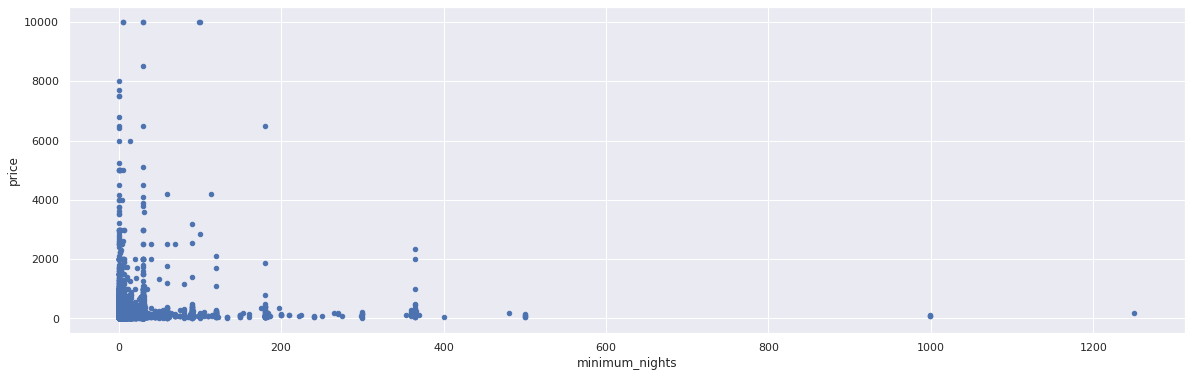

In [ ]:
#price Vs minimum nights
data=pd.concat([df['price'],df['minimum_nights']],axis=1)
data.plot.scatter(x= 'minimum_nights',y='price')

looks many data points are clustured on 0 price range, few have min nights for stay but price is 0.
There are many outliers as well.

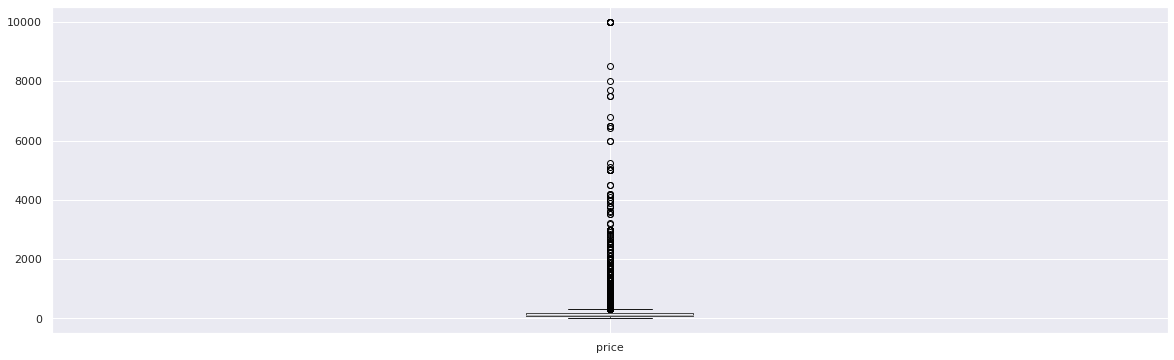

In [ ]:
df.boxplot(column=['price'])
plt.show()


we can see the presence of many outliers in price.


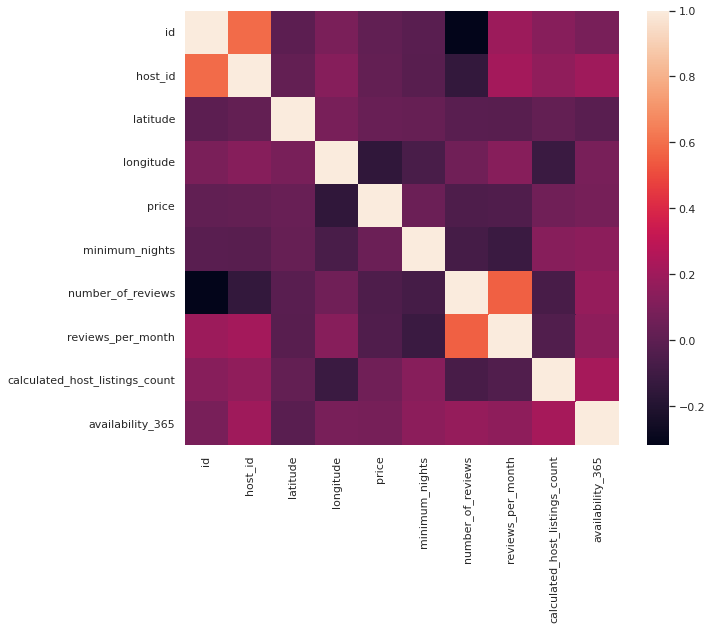

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, square=True);

Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365! 

In [ ]:
#top 5 listings on Airbnb in entire NYC:

TOp5_listings=df['name'].value_counts()[:5].reset_index()
TOp5_listings

,index,name
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


In [ ]:
#top 5 hosts on the basis of no of listings in entire NYC!
top_5_hosts=df['host_name'].value_counts()[:5] 
top_5_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

Text(0.5, 1.0, 'top 5 hosts on the basis of no of listings in entire NYC!')

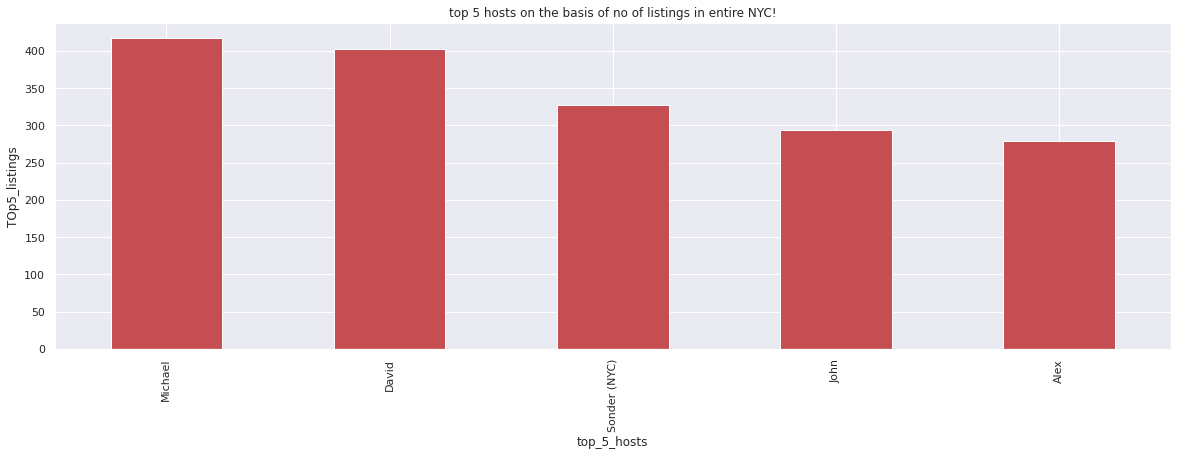

In [ ]:
top_5_hosts.plot(kind='bar',color='r')
plt.xlabel('top_5_hosts')
plt.ylabel('TOp5_listings')
plt.title('top 5 hosts on the basis of no of listings in entire NYC!')

In [ ]:
#looking at the unique neighbourhoods 
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

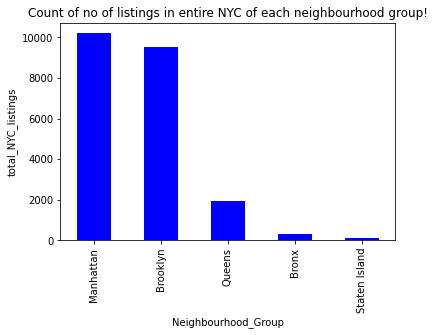

In [ ]:
#the neighbourhood group 'Manhattan' has the highest no of listings in entire NYC! 
df['neighbourhood_group'].value_counts().plot(kind='bar',color='b')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

**As shown in picture neighbourhood_group(Manhattan) have maximum no of listing**

In [ ]:
#top 10 neighbourhood
top_10_neigbours= df['neighbourhood'].value_counts()[:10]
top_10_neigbours

Williamsburg          1992
Bedford-Stuyvesant    1618
Harlem                1328
Upper West Side       1058
East Village          1014
Bushwick               969
Upper East Side        899
Hell's Kitchen         766
Crown Heights          761
Midtown                605
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

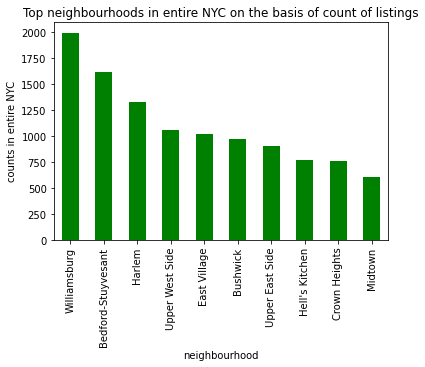

In [ ]:
#checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='g')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'count of each room types in entire NYC')

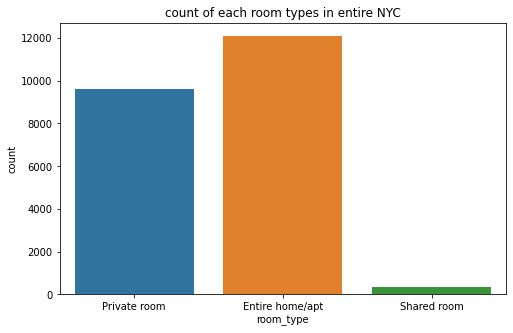

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(df['room_type'])
plt.title('count of each room types in entire NYC')

Text(0.5, 1.0, 'count of room types of each neighbourhood group in entire NYC')

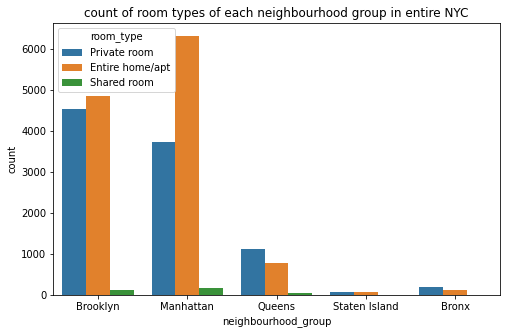

In [ ]:
from re import X
#count of each category of room type in each neighbourhood group in entire NYC!
#relationship between two categorical variables.

X = sns.countplot(x="neighbourhood_group",hue="room_type", data=df)
X.set_title('count of room types of each neighbourhood group in entire NYC')


**We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


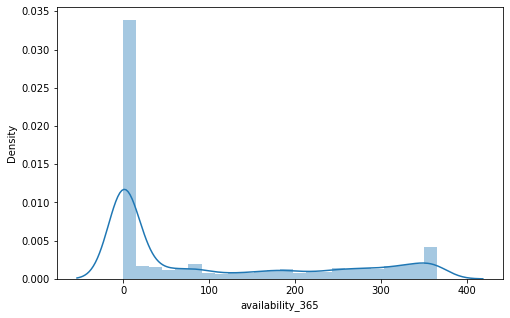

In [ ]:
#distribution of listings availability at NYC!
sns.distplot(df['availability_365'])

availability_365 have uniform distribution with availability ranging from 0 to 370.The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['availability_365'].skew())
print("Kurtosis: %f" % df['availability_365'].kurt())

Skewness: 0.847296
Kurtosis: -0.921578


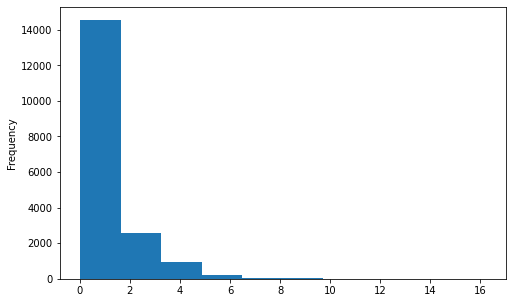

In [ ]:
df['reviews_per_month'].plot.hist()

# **Removing Outliers using IQR approach! (has performed best in removing outliers)**



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


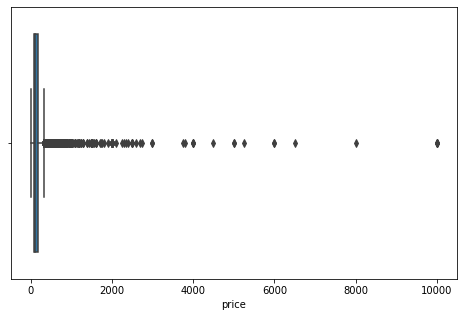

In [ ]:
sns.boxplot(df['price'])

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.207300e+04,2.207200e+04,22072.000000,22072.000000,22072.000000,22072.000000,22072.000000,18370.000000,22072.000000,22072.000000
mean,8.516120e+06,2.449478e+07,40.729519,-73.956889,151.244020,7.405989,35.798931,0.945933,3.720687,103.546212
std,5.261951e+06,2.710963e+07,0.053119,0.039178,235.510461,23.877139,58.853136,1.299869,12.934357,132.638206
min,1.700000e+01,2.571000e+03,40.499790,-74.242850,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,4.000561e+06,3.977643e+06,40.689777,-73.983262,73.000000,2.000000,1.000000,0.100000,1.000000,0.000000
50%,8.523688e+06,1.428943e+07,40.723370,-73.958010,110.000000,3.000000,9.000000,0.360000,1.000000,9.000000
75%,1.325856e+07,3.658105e+07,40.763940,-73.941480,175.000000,5.000000,45.000000,1.310000,2.000000,221.000000
max,1.775948e+07,1.211851e+08,40.908040,-73.712990,10000.000000,1250.000000,629.000000,16.220000,121.000000,365.000000


# **Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!**

In [ ]:
#Let's check the expensive listings with respect to prices leading in entire NYC!
df_gp= df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
df_gp


,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,87.595238
1,Bronx,Baychester,75.428571
2,Bronx,Belmont,77.125000
3,Bronx,Bronxdale,57.105263
4,Bronx,Castle Hill,63.000000
...,...,...,...
216,Staten Island,Tottenville,144.857143
217,Staten Island,West Brighton,80.555556
218,Staten Island,Westerleigh,71.500000
219,Staten Island,Willowbrook,249.000000


In [ ]:
df_gp=df_gp.sort_values( by="price",  ascending=False)[:5]

Text(0, 0.5, 'price')

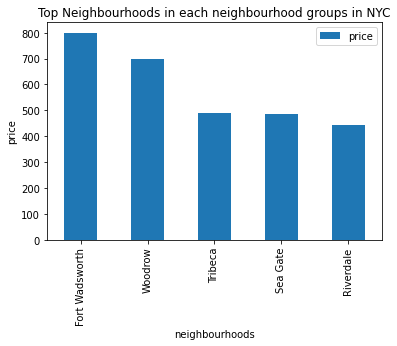

In [ ]:

df_gp.plot.bar(x='neighbourhood', title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

Text(0, 0.5, 'price')

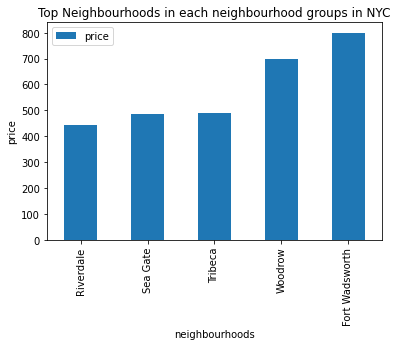

In [ ]:
#Let's check the cheapest listings with respect to prices leading in entire NYC!
df_gp=df_gp.sort_values( by="price",  ascending=True)
df_gp.plot.bar(x='neighbourhood', title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')


# **Let's play around with the reviews on listings in NYC!**

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]


,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


** this are the listings with highest number of reviews, the highest being: Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with a total of 27 reviews/month. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.**

Text(0, 0.5, 'Reviews counts')

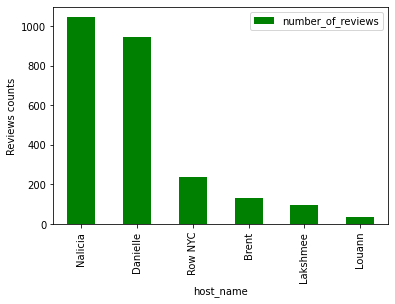

In [ ]:
reviews_df=top10_reviewed_listings.groupby('host_name')['number_of_reviews'].sum()
reviews_df=reviews_df.reset_index().sort_values(by='number_of_reviews',ascending=False)
reviews_df.plot(x='host_name',y='number_of_reviews',kind='bar',color='g')
plt.ylabel('Reviews counts')

# **Conclusion**

Airbnb hotel Booking is the best booking site .I evaluate every data of this project.like first I extract every data and compare with other data.and than data pre processing and cleaning.
In this we found out about null values and remove it.I used drop method to remove columns.I found out duplicate data also by using duplicated method and and remove it.
At last I compare with lots of data and make a diffrent plots to understand batter.

